# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023
...,...
2023-09-30,170.984741
2023-10-31,170.545319
2023-11-30,189.949997


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [6]:
# Difference in Stock Price
df["Diff"] = df["Adj Close"].diff().shift(-1)
# Target Up or Down
df["Target"] = np.sign(df["Diff"])
# Option Premium: 8% of Adj. Close for TP While Losing -100*Diff if FP
df["Premium"] = .08 * df["Adj Close"]
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])
X

,VAR1
Date,
1980-12-31,0.163261
1981-01-31,0.437449
1981-02-28,-0.334994
1981-03-31,2.550820
1981-04-30,3.170655
...,...
2023-05-31,2.330573
2023-06-30,3.033257
2023-07-31,1.007072


In [11]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()
y

Date
1980-12-31   -1.0
1981-01-31   -1.0
1981-02-28   -1.0
1981-03-31    1.0
1981-04-30    1.0
             ... 
2023-05-31    1.0
2023-06-30    1.0
2023-07-31   -1.0
2023-08-31   -1.0
2023-09-30   -1.0
Freq: M, Name: Target, Length: 514, dtype: float64

In [12]:
# logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
y_pred

array([-1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1

# 4.) Add columns, prediction and profits.

In [14]:
df["Predictions"] = y_pred

df["Profits"] = 0.

# True Positive: Prediction and Target are Up
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

# False Positive
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]

# 5.) Plot profits over time

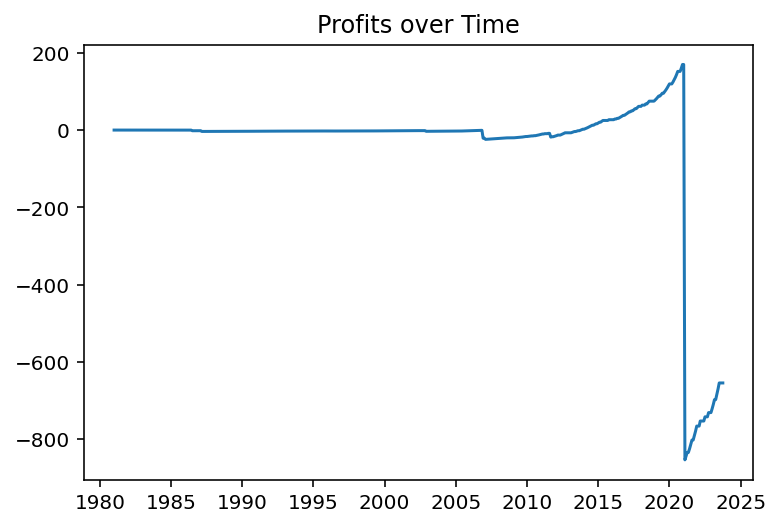

In [16]:
plt.plot(np.cumsum(df["Profits"]))
plt.title("Profits over Time")
%config InlineBackend.figure_format = 'retina'
plt.show()

# 5.5.) How you see your skills valuable to PJ and/or Philip Liu?

Answer: I would say the recent skills I acquired in today's class towards detection and classification would be valuable to the speakers. The skills in leveraging the most out of company's services by optimizing the deliverables of Arena cutting-edge consumers' experiences in both publishing and monetizing aspects.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.